In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

In [2]:
payment_df3 = pd.read_csv('C:/Users/dines/Downloads/PS_20174392719_1491204439457_log.csv') 

In [3]:
label_encoder = LabelEncoder()
payment_df3['type_encoded'] = label_encoder.fit_transform(payment_df3['type'])

In [4]:
col_select = ['type_encoded', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = payment_df3[col_select]
y = payment_df3['isFraud']  


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = rf_classifier.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
#confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [9]:
print(f'Accuracy: {accuracy:.4f}')
#print('Confusion Matrix:')
#print(confusion)
print('Classification Report:')
print(report)

Accuracy: 0.9997
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.79      0.87      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.90      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



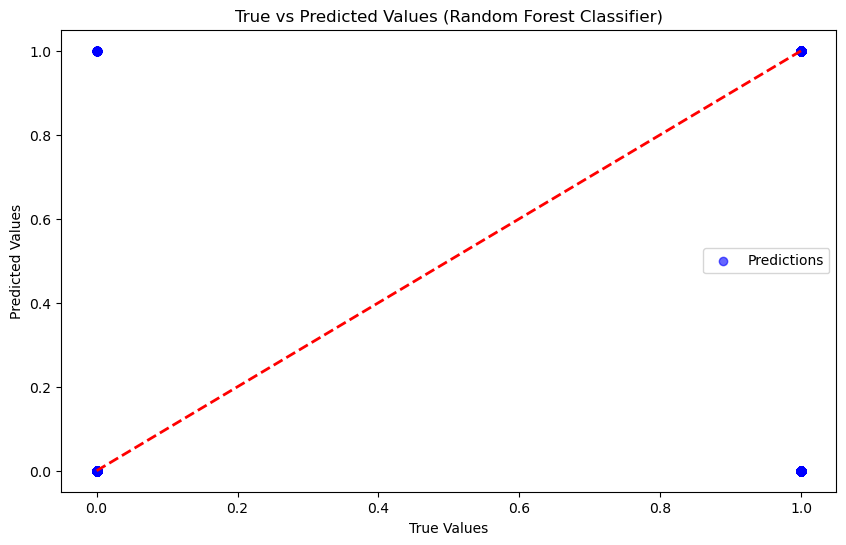

In [10]:
# Visualize the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Random Forest Classifier)')
plt.legend()
plt.show()